# **WEEK 5**
# ASSIGNMENT 1 (Genetic Algorithm for a travel salesman problem)


In [3]:
import numpy as np
import random

# Genetic Algorithm Implementation
class TravelingSalesmanGA:
    def __init__(self, graph):
        self.graph = graph
        self.num_cities = len(graph)
        self.population_size = 100
        self.num_generations = 500
        self.mutation_rate = 0.1
        self.tournament_size = 5
        self.elitism = True

    def initial_population(self):
        population = []
        for _ in range(self.population_size):
            individual = list(range(self.num_cities))
            random.shuffle(individual)
            population.append(individual)
        return population

    def calculate_distance(self, path):
        distance = 0
        for i in range(len(path)):
            from_city = path[i]
            to_city = path[(i + 1) % len(path)]
            distance += self.graph[from_city][to_city]
        return distance

    def fitness(self, individual):
        return 1 / self.calculate_distance(individual)

    def tournament_selection(self, population):
        tournament = random.sample(population, self.tournament_size)
        fittest_individual = max(tournament, key=self.fitness)
        return fittest_individual

    def ordered_crossover(self, parent1, parent2):
        start, end = sorted(random.sample(range(self.num_cities), 2))
        child = [None] * self.num_cities
        child[start:end] = parent1[start:end]
        filled = set(child[start:end])
        position = end

        for city in parent2:
            if city not in filled:
                if position >= self.num_cities:
                    position = 0
                child[position] = city
                position += 1

        return child

    def mutate(self, individual):
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(self.num_cities), 2)
            individual[i], individual[j] = individual[j], individual[i]

    def evolve(self, population):
        new_population = []
        elite_offset = 1 if self.elitism else 0

        if self.elitism:
            best_individual = max(population, key=self.fitness)
            new_population.append(best_individual)

        for _ in range(self.population_size - elite_offset):
            parent1 = self.tournament_selection(population)
            parent2 = self.tournament_selection(population)
            child = self.ordered_crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)

        return new_population

    def solve(self):
        population = self.initial_population()

        for _ in range(self.num_generations):
            population = self.evolve(population)

        best_route = max(population, key=self.fitness)
        best_distance = self.calculate_distance(best_route)
        return best_route, best_distance


# Example graph (distance matrix)
example_graph = np.array([
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
])

# Solving the problem
tsp_ga = TravelingSalesmanGA(example_graph)
best_route, best_distance = tsp_ga.solve()
best_route, best_distance



([1, 0, 2, 3], 21)

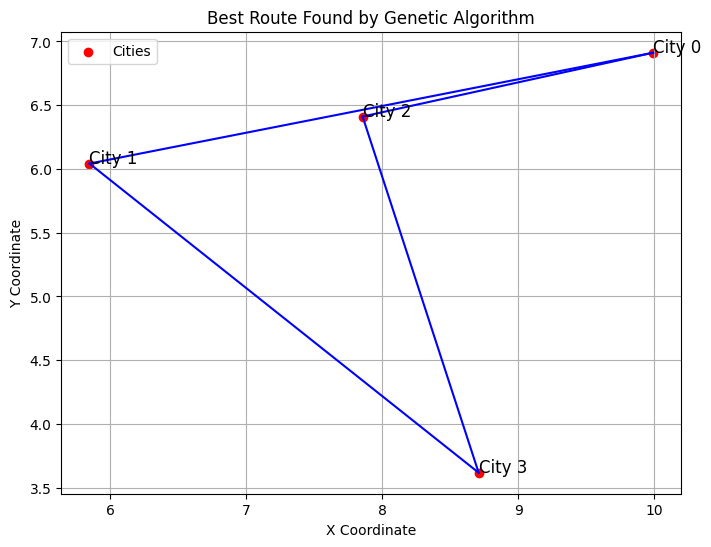

In [4]:
import matplotlib.pyplot as plt

# Generating arbitrary coordinates for each city (for demonstration purposes)
num_cities = len(example_graph)
city_coordinates = np.random.rand(num_cities, 2) * 10  # Generating random coordinates

# Plotting the cities and the path
plt.figure(figsize=(8, 6))
plt.scatter(city_coordinates[:, 0], city_coordinates[:, 1], c='red', label='Cities')

# Adding labels for cities
for i, coord in enumerate(city_coordinates):
    plt.text(coord[0], coord[1], f'City {i}', fontsize=12)

# Drawing the path
for i in range(len(best_route)):
    start_city = best_route[i]
    end_city = best_route[(i + 1) % len(best_route)]
    start_coord = city_coordinates[start_city]
    end_coord = city_coordinates[end_city]
    plt.plot([start_coord[0], end_coord[0]], [start_coord[1], end_coord[1]], 'b-')

plt.title("Best Route Found by Genetic Algorithm")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()


# **ASSIGNMENT 2**
# Simulated Annealing algorithm for a Traveling Salesman problem

[0, 1, 2, 3] 28


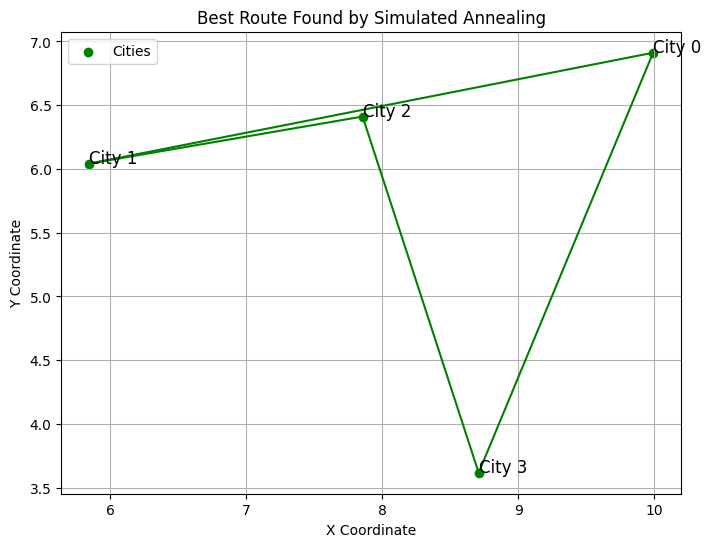

In [27]:
import math

class SimulatedAnnealingTSP:
    def __init__(self, graph):
        self.graph = graph
        self.num_cities = len(graph)
        self.temperature = 10000
        self.cooling_rate = 0.003

    def initial_solution(self):
        solution = list(range(self.num_cities))
        random.shuffle(solution)
        return solution

    def calculate_distance(self, path):
        distance = 0
        for i in range(len(path)):
            from_city = path[i]
            to_city = path[(i + 1) % len(path)]
            distance += self.graph[from_city][to_city]
        return distance

    def acceptance_probability(self, old_cost, new_cost, temperature):
        if new_cost < old_cost:
            return 1.0
        return math.exp((old_cost - new_cost) / temperature)

    def get_neighbor(self, solution):
        new_solution = solution.copy()
        i, j = random.sample(range(self.num_cities), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
        return new_solution

    def anneal(self):
        current_solution = self.initial_solution()
        current_cost = self.calculate_distance(current_solution)
        best_solution = current_solution
        best_cost = current_cost

        while self.temperature > 1:
            neighbor_solution = self.get_neighbor(current_solution)
            neighbor_cost = self.calculate_distance(neighbor_solution)

            if self.acceptance_probability(current_cost, neighbor_cost, self.temperature) > random.random():
                current_solution = neighbor_solution
                current_cost = neighbor_cost

                if current_cost < best_cost:
                    best_solution = current_solution
                    best_cost = current_cost

            self.temperature *= 1 - self.cooling_rate

        return best_solution, best_cost

# Example graph (distance matrix)
example_graph2 = np.array([
    [0, 8, 9, 10],
    [26, 0, 6, 4],
    [15, 12, 0, 8],
    [6, 5, 12, 0]
])

# Solving the problem using Simulated Annealing
sat = SimulatedAnnealingTSP(example_graph2)
best_route_sa, best_distance_sa = sat.anneal()
print(best_route_sa, best_distance_sa)


# Creating a 2D plot for the Simulated Annealing solution using the provided code
plt.figure(figsize=(8, 6))
plt.scatter(city_coordinates[:, 0], city_coordinates[:, 1], c='green', label='Cities')

# Adding labels for cities
for i, coord in enumerate(city_coordinates):
    plt.text(coord[0], coord[1], f'City {i}', fontsize=12)

# Drawing the path in 2D
for i in range(len(best_route_sa)):
    start_city = best_route_sa[i]
    end_city = best_route_sa[(i + 1) % len(best_route_sa)]
    start_coord = city_coordinates[start_city]
    end_coord = city_coordinates[end_city]
    plt.plot([start_coord[0], end_coord[0]], [start_coord[1], end_coord[1]], 'g-')

plt.title("Best Route Found by Simulated Annealing")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()

